In [ ]:
# Get the fastai libraries and other important stuff: https://course.fast.ai/start_colab.html
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [ ]:
# Authenticate Colab to use my Google Drive for data storage and retrieval
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'BreastCancer'

Mounted at /content/gdrive


In [ ]:
base_dir

'/content/gdrive/My Drive/BreastCancer'

In [ ]:
# Change the working directory
%cd /content/gdrive/My\ Drive/BreastCancer

/content/gdrive/My Drive/BreastCancer


In [ ]:
# Verify
!pwd

/content/gdrive/My Drive/BreastCancer


In [ ]:
!unzip /content/gdrive/My\ Drive/BreastCancer/IDC_regular_ps50_idx5.zip

In [ ]:
!find /content/gdrive/My\ Drive/BreastCancer -maxdepth 1 -type d | wc -l

281


In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from fastai.vision import *
from fastai.metrics import *

import numpy as np
np.random.seed(7)

import torch
torch.cuda.manual_seed_all(7)

import matplotlib.pyplot as ply
plt.style.use('ggplot')

In [ ]:
tfms = get_transforms(do_flip=True, flip_vert=True, 
                      max_lighting=0.3, max_warp=0.3, max_rotate=20., max_zoom=0.05)
len(tfms)

2

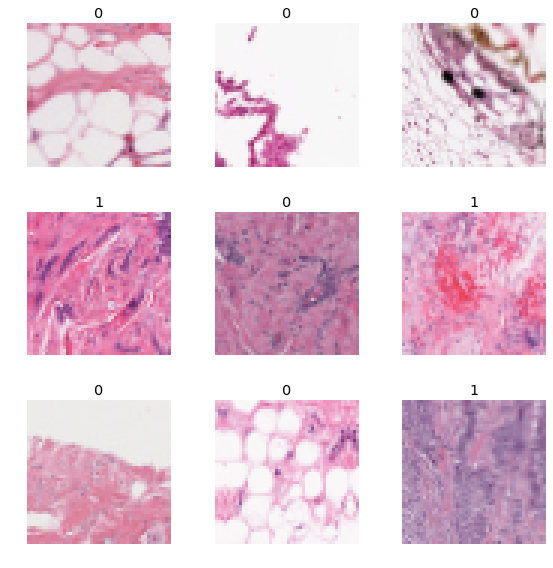

In [ ]:
path = '/content/gdrive/My Drive/BreastCancer/'
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, valid_pct=0.2,
                                  size=48, bs=128).normalize(imagenet_stats)

data.show_batch(rows=3, figsize=(8,8))

In [ ]:
from collections import Counter

In [ ]:
# Training set
train_counts = Counter(data.train_ds.y)
train_counts.most_common()

[(Category 0, 159089), (Category 1, 62931)]

In [ ]:
# Validation set
valid_counts = Counter(data.valid_ds.y)
valid_counts.most_common()

[(Category 0, 39649), (Category 1, 15855)]

In [ ]:
# Initializing the custom class weights and pop it to the GPU
from torch import nn

weights = [0.4, 1]
class_weights=torch.FloatTensor(weights).cuda()

epoch,train_loss,valid_loss,accuracy,time
0,0.400638,0.361613,0.843921,16:40
1,0.361891,0.329866,0.861596,16:15
2,0.347648,0.316130,0.858407,15:58
3,0.325453,0.307718,0.871036,16:11
4,0.330143,0.305901,0.868460,16:05


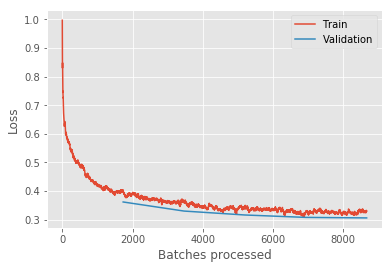

In [ ]:
# Begin the training
learn = cnn_learner(data, models.resnet50, metrics=[accuracy]).to_fp16()
learn.loss_func = nn.CrossEntropyLoss(weight=class_weights)
learn.fit_one_cycle(5);
learn.recorder.plot_losses()

In [ ]:
# Saving the model
learn.save('stage-1-rn50')

### Model's losses, accuracy scores and more

In [ ]:
# Model's final validation loss and accuracy
learn.validate()

[0.30590087, tensor(0.8685)]

`tensor(0.8685)` denotes an accuracy score of **86.85%**.

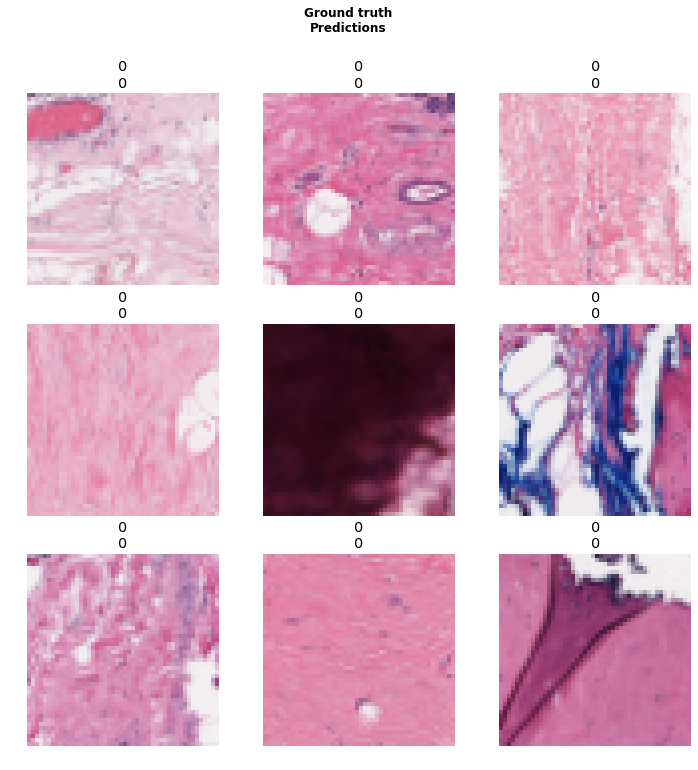

In [ ]:
# Looking at model's results
learn.show_results(rows=3)